<a href="https://colab.research.google.com/github/fabianozonta/S-P500/blob/main/Projeto_1_S%26P_500_Companies_with_Financial_Information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('/content/constituents-financials_csv.csv')
data.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    int64  
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(9), int64(1), object(4)
memory usage: 55.4+ KB


In [13]:
data['Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Consumer Staples', 'Energy',
       'Telecommunication Services'], dtype=object)

In [14]:
data.shape

(505, 14)

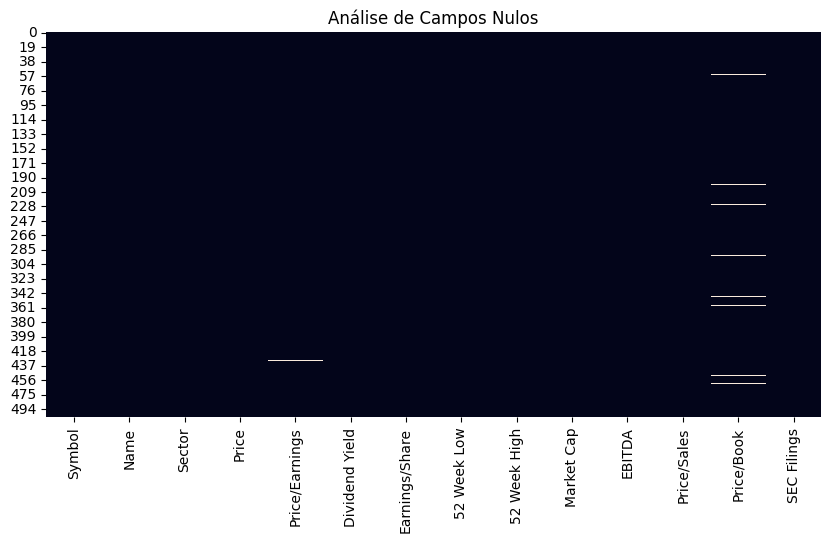

In [17]:
nulos = data.isnull()

plt.figure(figsize=(10, 5))
plt.title('Análise de Campos Nulos')
sns.heatmap(nulos, cbar=False);

In [21]:
data.nunique()

Symbol            505
Name              505
Sector             11
Price             494
Price/Earnings    457
Dividend Yield    420
Earnings/Share    402
52 Week Low       501
52 Week High      495
Market Cap        505
EBITDA            444
Price/Sales       505
Price/Book        391
SEC Filings       505
dtype: int64

In [23]:
data.duplicated().sum() # Zero base duplicadas

0

In [24]:
data['Sector'].value_counts()

Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

In [26]:
data.groupby('Sector').sum()

<ipython-input-26-72a90e13e8e0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Sector').sum()


,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
Sector,,,,,,,,,,
Consumer Discretionary,10418.90,2119.49,132.082638,409.84,12342.2399,8071.758553,3213562747315,2.941510e+11,191.164584,2440.66
Consumer Staples,2711.98,746.75,82.735293,124.42,3156.2977,2343.601000,2087076388082,1.799275e+11,97.569396,1916.46
Energy,1852.40,1233.89,64.462468,-52.75,2322.8700,1540.519500,1357313712749,1.420450e+11,118.067035,73.20
Financials,6055.81,1169.53,137.172367,301.71,6923.8857,4943.223800,3442649464852,3.597660e+10,228.356354,458.00
Health Care,8083.46,1406.27,55.951842,264.77,9806.2706,6326.874430,3244359043367,2.231056e+11,294.461598,540.34
Industrials,7831.47,1440.12,99.119260,358.05,9016.8249,6086.080600,2411541173034,2.052230e+11,172.417862,605.40
Information Technology,8347.00,2602.59,85.994554,217.70,9714.5049,6432.399100,6727121800912,4.313397e+11,411.609970,761.15
Materials,2559.67,513.56,43.449399,123.30,2950.9713,2139.581200,692300259151,5.710869e+10,71.902337,119.72
Real Estate,2927.52,741.15,128.527017,78.91,3648.1650,2734.976900,625315677562,4.568073e+10,328.768488,198.16


In [27]:
data.dropna()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [28]:
data.dropna(axis=1)

,Symbol,Name,Sector,Price,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,SEC Filings
0,MMM,3M Company,Industrials,222.89,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [30]:
data.sort_values(by='Price', ascending=False)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
372,PCLN,Priceline.com Inc,Consumer Discretionary,1806.06,24.26,0.000000,42.66,2067.990,1589.0000,91817448863,4.803487e+09,9.176564,6.92,http://www.sec.gov/cgi-bin/browse-edgar?action...
30,AMZN,Amazon.com Inc,Consumer Discretionary,1350.50,296.16,0.000000,6.16,1498.000,812.5000,685873374731,1.613200e+10,3.927053,24.28,http://www.sec.gov/cgi-bin/browse-edgar?action...
27,GOOGL,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.000000,22.27,1198.000,824.3000,733823966137,3.421700e+10,6.801692,4.70,http://www.sec.gov/cgi-bin/browse-edgar?action...
28,GOOG,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.000000,22.27,1186.890,803.1903,728535558140,3.271400e+10,6.772653,4.67,http://www.sec.gov/cgi-bin/browse-edgar?action...
61,AZO,AutoZone Inc,Consumer Discretionary,718.57,16.31,0.000000,44.09,797.890,491.1300,19922021415,2.347304e+09,1.851043,136.23,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,UA,Under Armour Class C,Consumer Discretionary,11.95,29.15,0.000000,0.45,21.805,10.3600,5366628950,3.992770e+08,1.473879,2.50,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.7000,11191663795,3.390000e+08,2.109195,21.47,http://www.sec.gov/cgi-bin/browse-edgar?action...
200,F,Ford Motor,Consumer Discretionary,10.43,5.89,6.784387,1.90,13.480,10.1900,42414328338,9.281000e+09,0.270541,1.26,http://www.sec.gov/cgi-bin/browse-edgar?action...
10,AES,AES Corp,Utilities,10.06,9.96,4.961832,-1.72,12.050,10.0000,6920851212,3.001000e+09,0.659514,2.20,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [31]:
data.sort_values(by='Dividend Yield', ascending=False)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
99,CTL,CenturyLink Inc,Telecommunication Services,16.20,8.35,12.661196,1.16,27.61,13.161,18237196861,5.577000e+09,1.479598,1.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
269,KIM,Kimco Realty,Real Estate,14.01,9.28,7.713499,0.80,25.15,14.330,6180487499,7.011900e+08,7.050894,1.20,http://www.sec.gov/cgi-bin/browse-edgar?action...
257,IRM,Iron Mountain Incorporated,Real Estate,32.07,15.42,7.082580,0.46,41.53,32.050,9410249279,1.116140e+09,3.289863,4.97,http://www.sec.gov/cgi-bin/browse-edgar?action...
200,F,Ford Motor,Consumer Discretionary,10.43,5.89,6.784387,1.90,13.48,10.190,42414328338,9.281000e+09,0.270541,1.26,http://www.sec.gov/cgi-bin/browse-edgar?action...
405,SCG,SCANA Corp,Utilities,35.60,8.75,6.683033,4.16,71.28,35.310,5229448882,1.459000e+09,1.651705,0.92,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ADSK,Autodesk Inc,Information Technology,104.81,-77.07,0.000000,-2.61,131.10,81.750,24348294504,-3.781000e+08,16.506820,224.13,http://www.sec.gov/cgi-bin/browse-edgar?action...
61,AZO,AutoZone Inc,Consumer Discretionary,718.57,16.31,0.000000,44.09,797.89,491.130,19922021415,2.347304e+09,1.851043,136.23,http://www.sec.gov/cgi-bin/browse-edgar?action...
427,SNPS,Synopsys Inc.,Information Technology,82.62,67.72,0.000000,0.87,94.80,64.750,12767067883,5.798440e+08,6.276264,3.98,http://www.sec.gov/cgi-bin/browse-edgar?action...
328,NFX,Newfield Exploration Co,Energy,26.38,13.12,0.000000,-6.50,43.74,24.410,5695123080,8.960000e+08,4.703259,4.51,http://www.sec.gov/cgi-bin/browse-edgar?action...


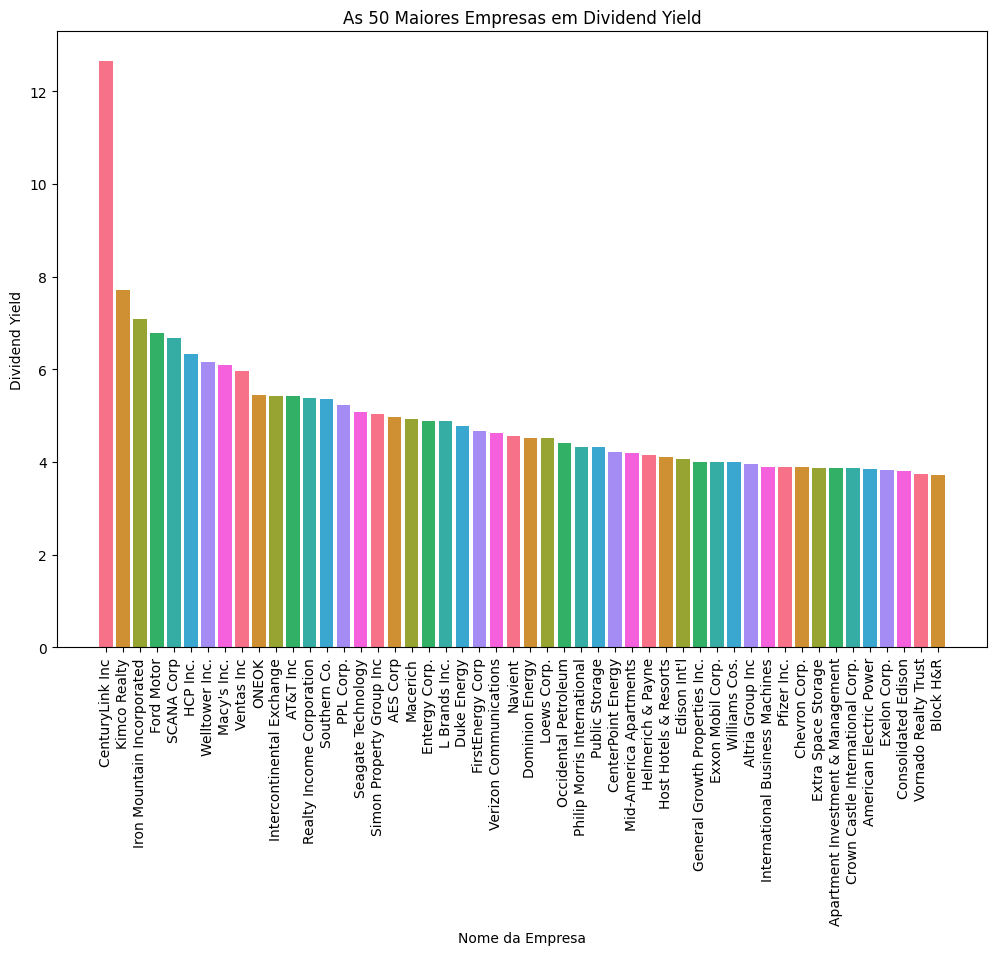

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame chamado 'data' com uma coluna 'Dividend Yield'
# Vamos criar um gráfico de barras das 50 maiores empresas em termos de Dividend Yield.

# Primeiro, classifique o DataFrame com base no Dividend Yield em ordem decrescente.
data_sorted = data.sort_values(by='Dividend Yield', ascending=False)

# Selecione as 50 primeiras linhas (as 50 maiores empresas).
top_50_dividend_yield = data_sorted.head(50)

# Crie uma figura e um eixo para o gráfico de barras.
fig, ax = plt.subplots(figsize=(12, 8))

#Paleta personalizada
Paleta_Cores = sns.color_palette('husl', 8)

# Use o método 'bar' do Matplotlib para criar o gráfico de barras.
# Os rótulos no eixo x serão os nomes das empresas e os valores no eixo y serão o Dividend Yield.
ax.bar(top_50_dividend_yield['Name'], top_50_dividend_yield['Dividend Yield'], color=Paleta_Cores)

# Personalize o gráfico com rótulos e título.
ax.set_xlabel('Nome da Empresa')
ax.set_ylabel('Dividend Yield')
ax.set_title('As 50 Maiores Empresas em Dividend Yield')

# Rode os rótulos no eixo x para melhorar a legibilidade.
plt.xticks(rotation=90)

# Mostre o gráfico.
plt.show()


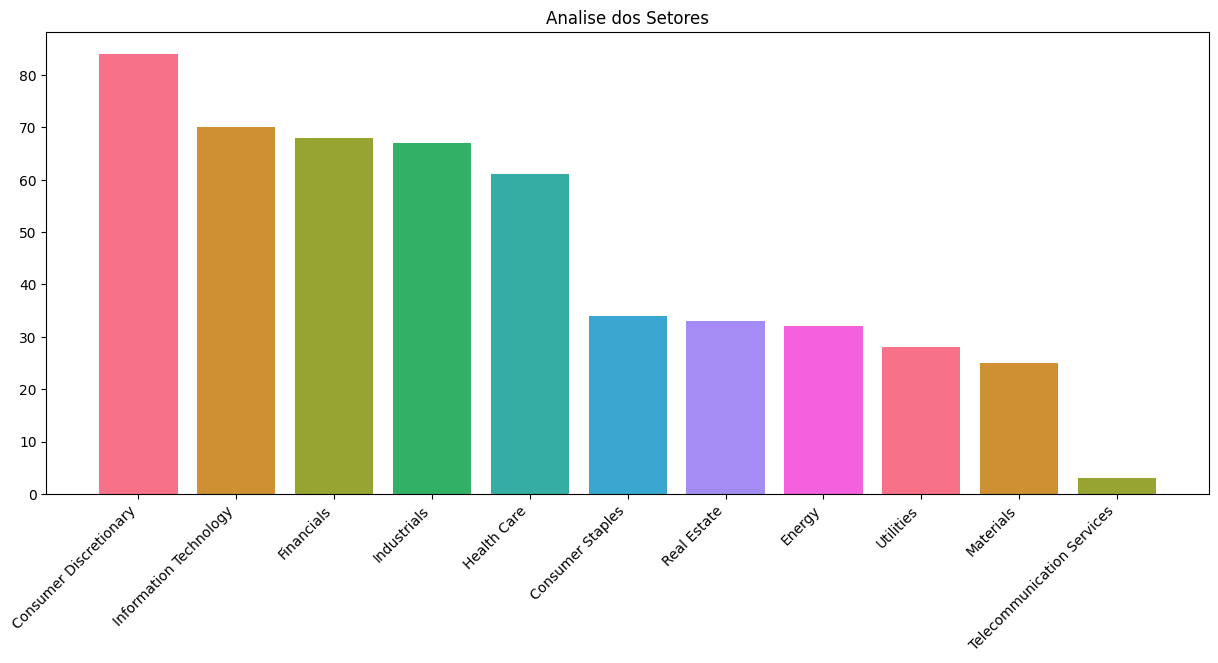

In [51]:
plt.figure( figsize=(15,6) )
plt.title('Analise dos Setores')
plt.bar( data['Sector'].value_counts().index, data['Sector'].value_counts(), color=Paleta_Cores)
plt.xticks( rotation=45, ha='right' );

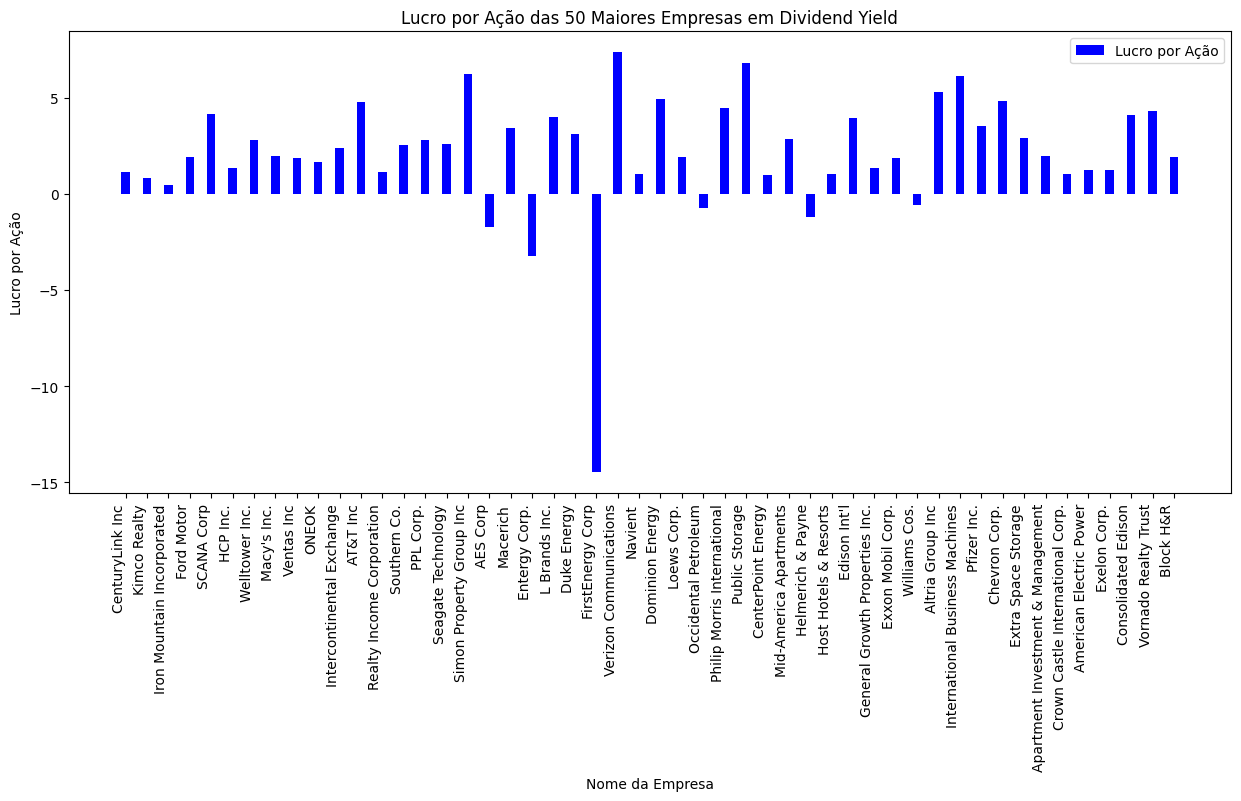

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

data_sorted = data.sort_values(by='Dividend Yield', ascending=False)

# Selecione as 50 primeiras linhas (as 50 maiores empresas).
top_50_dividend_yield = data_sorted.head(50)

# Crie uma figura e um eixo para o gráfico de barras agrupado.
fig, ax = plt.subplots(figsize=(15, 6))

# Use o método 'bar' do Matplotlib para criar o gráfico de barras agrupado.
bar_width = 0.4
index = range(len(top_50_dividend_yield))
ax.bar(index, top_50_dividend_yield['Earnings/Share'], bar_width, label='Lucro por Ação', color='b')

# Personalize o gráfico com rótulos e título.
ax.set_xlabel('Nome da Empresa')
ax.set_ylabel('Lucro por Ação')
ax.set_title('Lucro por Ação das 50 Maiores Empresas em Dividend Yield')

# Rótulos no eixo x.
company_names = top_50_dividend_yield['Name']
ax.set_xticks(index)
ax.set_xticklabels(company_names, rotation=90, ha='right')

# Mostre o gráfico com a legenda.
plt.legend()

# Mostrar o gráfico.
plt.show()


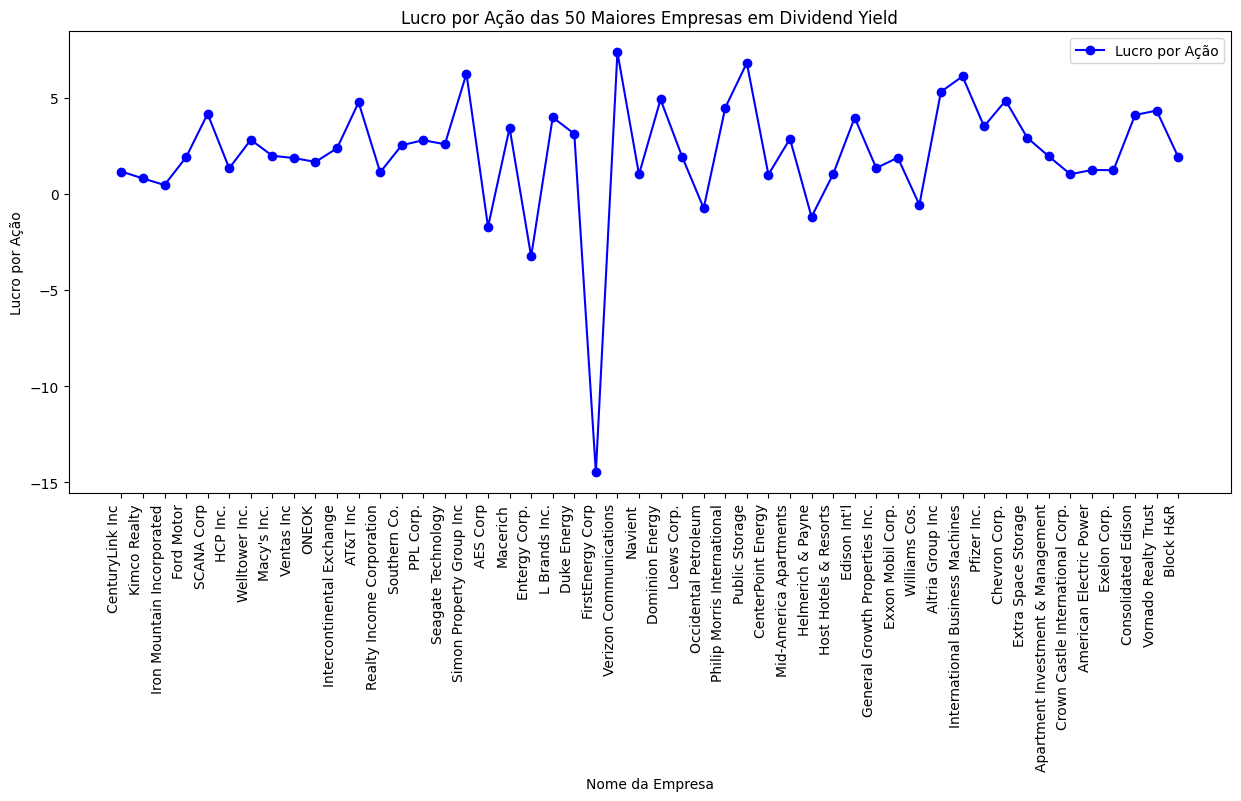

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Primeiro, classifique o DataFrame com base no Dividend Yield em ordem decrescente.
data_sorted = data.sort_values(by='Dividend Yield', ascending=False)

# Selecione as 50 primeiras linhas (as 50 maiores empresas).
top_50_dividend_yield = data_sorted.head(50)

# Crie uma figura e um eixo para o gráfico de linha.
fig, ax = plt.subplots(figsize=(15, 6))

# Use o método 'plot' do Matplotlib para criar o gráfico de linha.
index = range(len(top_50_dividend_yield))
ax.plot(index, top_50_dividend_yield['Earnings/Share'], marker='o', linestyle='-', label='Lucro por Ação', color='b')

# Personalize o gráfico com rótulos e título.
ax.set_xlabel('Nome da Empresa')
ax.set_ylabel('Lucro por Ação')
ax.set_title('Lucro por Ação das 50 Maiores Empresas em Dividend Yield')

# Rótulos no eixo x.
company_names = top_50_dividend_yield['Name']
ax.set_xticks(index)
ax.set_xticklabels(company_names, rotation=90, ha='right')

# Mostrar o gráfico com a legenda.
plt.legend()

# Mostrar o gráfico.
plt.show()


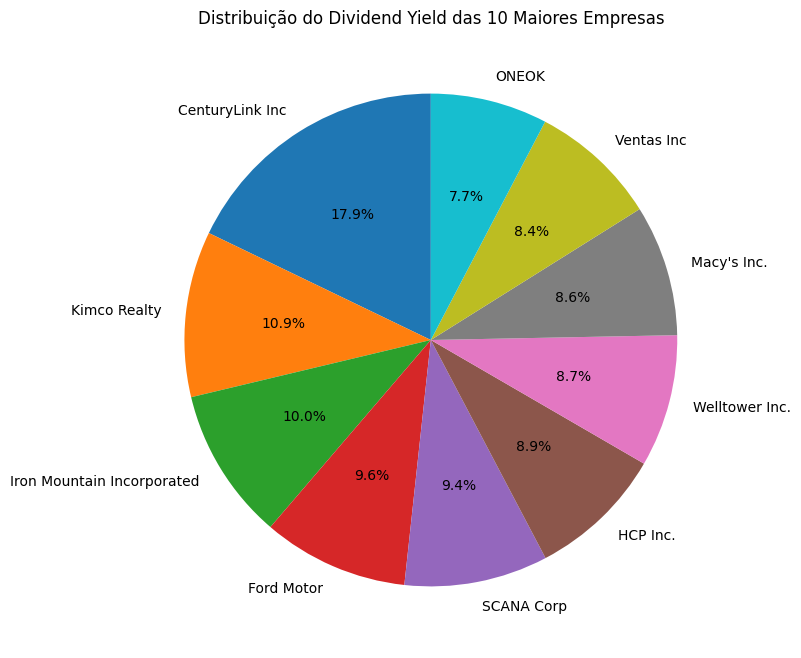

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


data_sorted = data.sort_values(by='Dividend Yield', ascending=False)

# Selecione as 50 primeiras linhas (as 10 maiores empresas).
top_10_dividend_yield = data_sorted.head(10)

# Prepare os dados para o gráfico de pizza.
dividend_yields = top_10_dividend_yield['Dividend Yield']
company_names = top_10_dividend_yield['Name']

# Crie uma figura e um eixo para o gráfico de pizza.
fig, ax = plt.subplots(figsize=(8, 8))

# Crie o gráfico de pizza.
ax.pie(dividend_yields, labels=company_names, autopct='%1.1f%%', startangle=90)

# Personalize o título.
ax.set_title('Distribuição do Dividend Yield das 10 Maiores Empresas')

# Mostrar o gráfico.
plt.show()


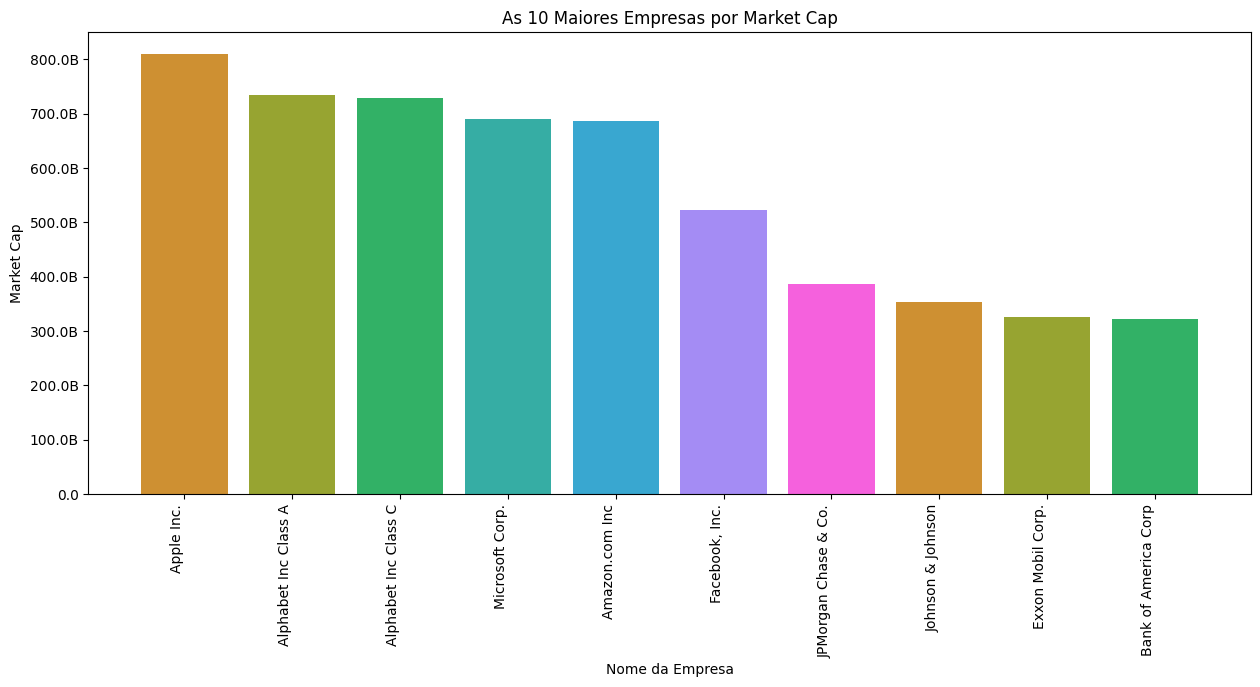

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Suponha que você tenha um DataFrame chamado 'data' com as colunas 'Name' e 'Market Cap'
# Vamos criar um gráfico de barras para representar as 10 maiores empresas com base no Market Cap.

# Primeiro, classifique o DataFrame com base no Market Cap em ordem decrescente.
data_sorted = data.sort_values(by='Market Cap', ascending=False)

# Selecione as 10 primeiras linhas (as 10 maiores empresas).
top_10_market_cap = data_sorted.head(10)

# Função para formatar os valores do Market Cap em bilhões (B) ou milhões (M)
def format_market_cap(value, _):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    else:
        return value

# Crie uma figura e um eixo para o gráfico de barras.
fig, ax = plt.subplots(figsize=(15, 6))

# Use o método 'bar' do Matplotlib para criar o gráfico de barras.
index = range(len(top_10_market_cap))
ax.bar(top_10_market_cap['Name'], top_10_market_cap['Market Cap'], color=Paleta_Cores[1:])

# Personalize o gráfico com rótulos e título.
ax.set_xlabel('Nome da Empresa')
ax.set_ylabel('Market Cap')
ax.set_title('As 10 Maiores Empresas por Market Cap')

# Formate os rótulos do eixo y usando a função format_market_cap
ax.yaxis.set_major_formatter(FuncFormatter(format_market_cap))

# Rótulos no eixo x.
company_names = top_10_market_cap['Name']
ax.set_xticks(index)
ax.set_xticklabels(company_names, rotation=90, ha='right')

# Mostrar o gráfico.
plt.show()


In [87]:
data.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


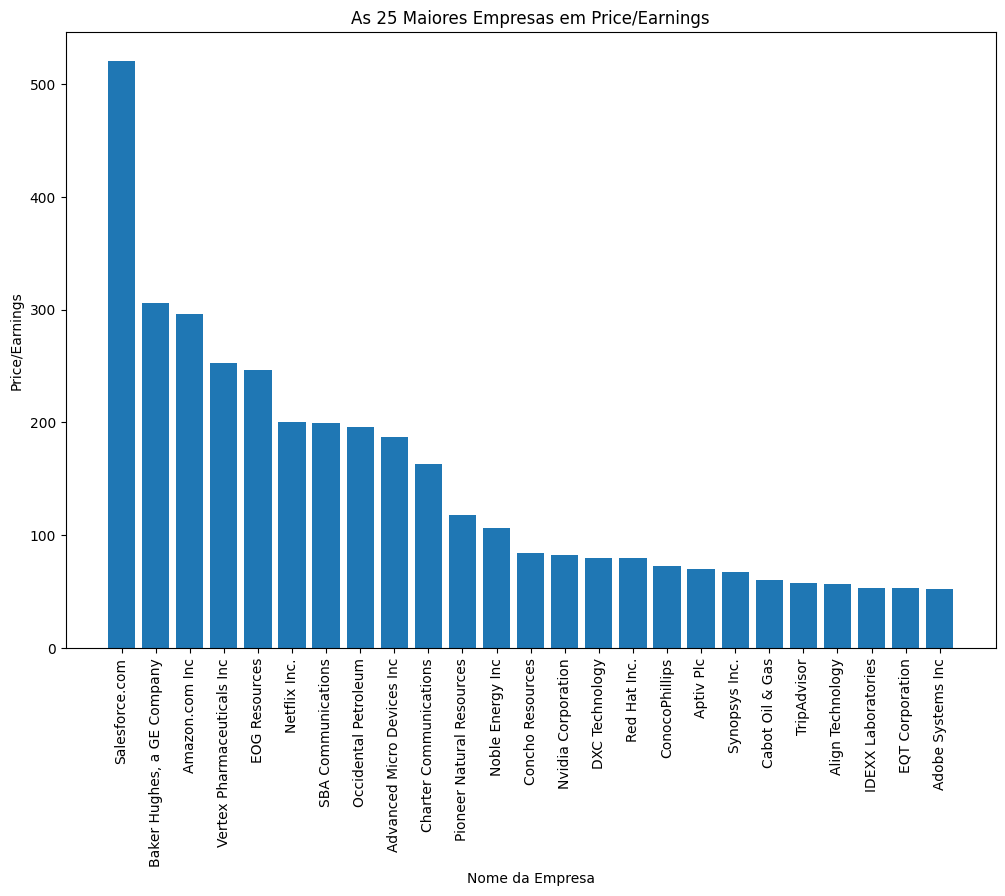

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importe a biblioteca seaborn para personalização de cores

# Primeiro, classifique o DataFrame com base no Price/Earnings em ordem decrescente.
data_sorted = data.sort_values(by='Price/Earnings', ascending=False)

# Selecione as 25 primeiras linhas (as 25 maiores empresas).
top_25_price_earnings = data_sorted.head(25)

# Crie uma figura e um eixo para o gráfico de barras.
fig, ax = plt.subplots(figsize=(12, 8))

# Paleta personalizada
Paleta_Cores = sns.color_palette('husl', 8)

# Use o método 'bar' do Matplotlib para criar o gráfico de barras.
# Os rótulos no eixo x serão os nomes das empresas e os valores no eixo y serão o Price/Earnings.
ax.bar(top_25_price_earnings['Name'], top_25_price_earnings['Price/Earnings'])

# Personalize o gráfico com rótulos e título.
ax.set_xlabel('Nome da Empresa')
ax.set_ylabel('Price/Earnings')
ax.set_title('As 25 Maiores Empresas em Price/Earnings')

# Rode os rótulos no eixo x para melhorar a legibilidade.
plt.xticks(rotation=90)

# Mostre o gráfico.
plt.show()


In [92]:
data.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


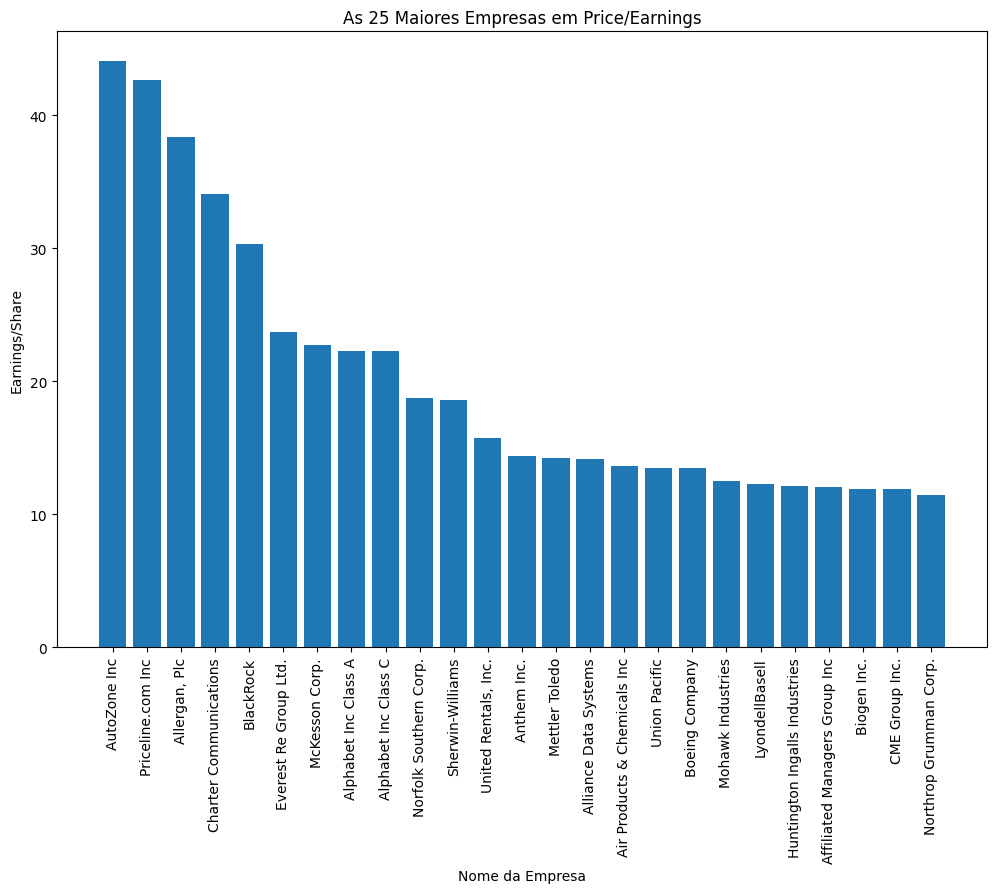

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importe a biblioteca seaborn para personalização de cores

# Primeiro, classifique o DataFrame com base no Price/Earnings em ordem decrescente.
data_sorted = data.sort_values(by='Earnings/Share', ascending=False)

# Selecione as 25 primeiras linhas (as 25 maiores empresas).
top_25_price_earnings = data_sorted.head(25)

# Crie uma figura e um eixo para o gráfico de barras.
fig, ax = plt.subplots(figsize=(12, 8))

# Paleta personalizada
Paleta_Cores = sns.color_palette('husl', 8)

# Use o método 'bar' do Matplotlib para criar o gráfico de barras.
# Os rótulos no eixo x serão os nomes das empresas e os valores no eixo y serão o Price/Earnings.
ax.bar(top_25_price_earnings['Name'], top_25_price_earnings['Earnings/Share'])

# Personalize o gráfico com rótulos e título.
ax.set_xlabel('Nome da Empresa')
ax.set_ylabel('Earnings/Share')
ax.set_title('As 25 Maiores Empresas em Price/Earnings')

# Rode os rótulos no eixo x para melhorar a legibilidade.
plt.xticks(rotation=90)

# Mostre o gráfico.
plt.show()


In [99]:
# Substitua "data" pelo nome do seu DataFrame, e "AAPL" pelo símbolo da empresa que você está procurando.
empresa_procurada = "AAPL"

# Realize a consulta para encontrar o nome da empresa com o símbolo "AAPL".
nome_da_empresa = data[data['Symbol'] == empresa_procurada]['Name'].values[0]

# O nome da empresa será armazenado na variável "nome_da_empresa".
print(nome_da_empresa)


Apple Inc.


In [102]:
apple_data['52 Week Low'].isnull()

51    False
Name: 52 Week Low, dtype: bool

In [107]:
data.dropna(subset=['52 Week Low'])

data.dropna(subset=['52 Week High'])

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...
